In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from glob import glob
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/My Drive/dataset/sayuran/kentang/train/'
val_dir='/content/drive/My Drive/dataset/sayuran/kentang/val/'

In [4]:
folders = glob('/content/drive/My Drive/dataset/sayuran/kentang/train/*')
folders

['/content/drive/My Drive/dataset/sayuran/kentang/train/earlyblight_hawardaunkentangdini',
 '/content/drive/My Drive/dataset/sayuran/kentang/train/healthy_sehat',
 '/content/drive/My Drive/dataset/sayuran/kentang/train/lateblight_hawardaunkentangakhir']

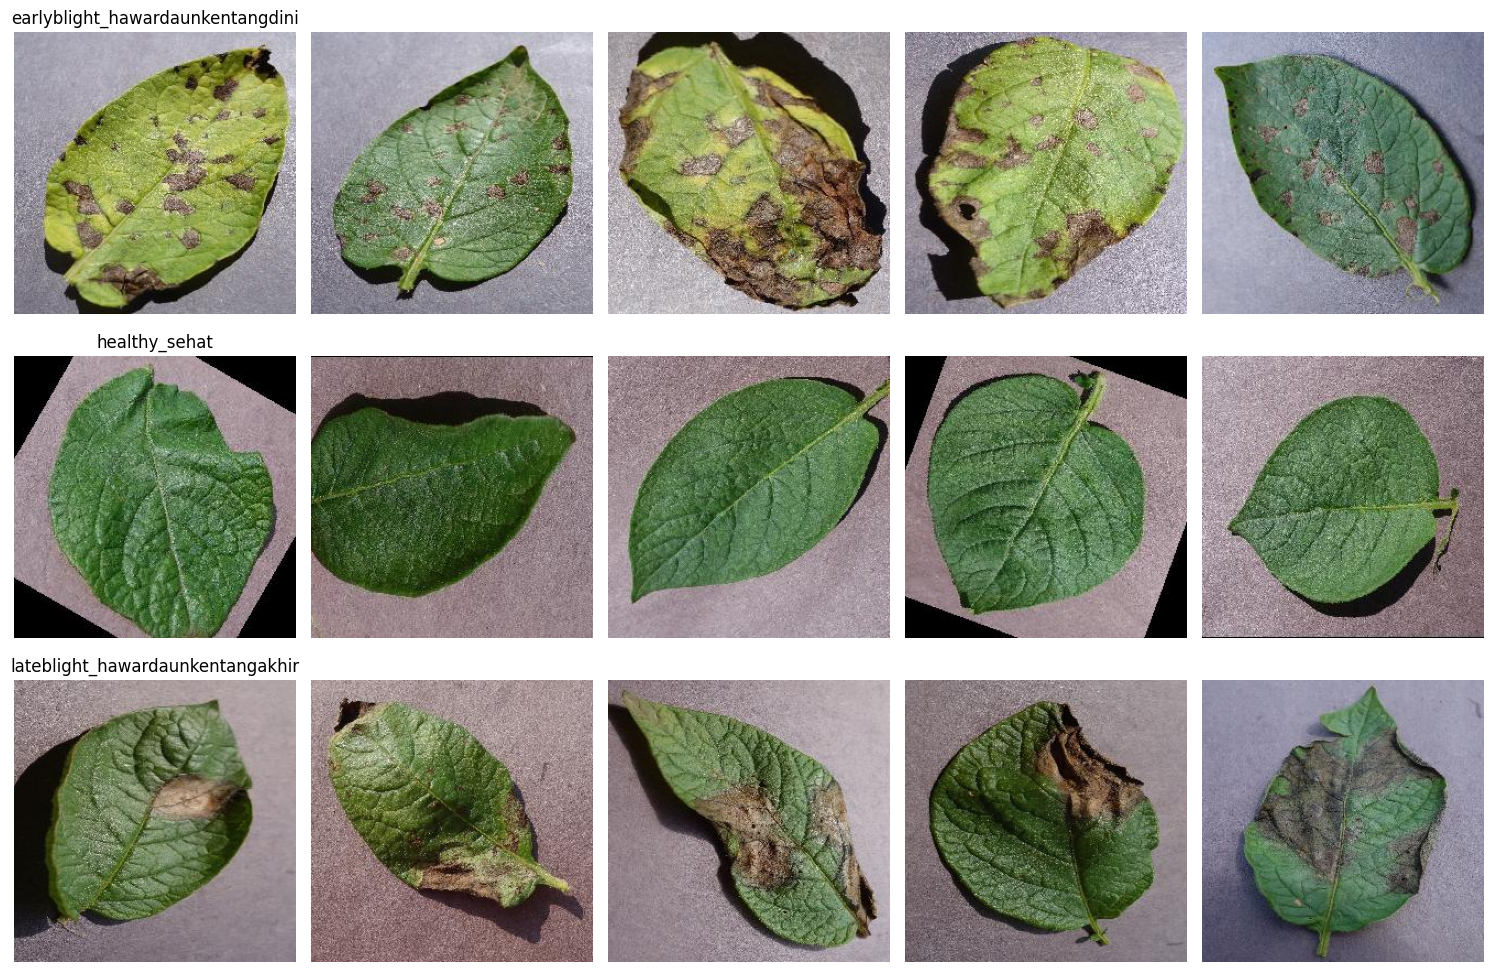

In [5]:
categories = os.listdir(train_dir)

plt.figure(figsize=(15, 10))
num_categories = len(categories)

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)[:5]

    for j, file in enumerate(image_files):
        img_path = os.path.join(category_path, file)
        img = load_img(img_path)
        plt.subplot(num_categories, 5, i * 5 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 0:
            plt.title(category)

plt.tight_layout()
plt.show()

In [6]:
# Menyiapkan data generator untuk augmentasi dan pra-pemrosesan data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Skalasi nilai pixel ke rentang [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Mendefinisikan generator untuk data train dan data validasi
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Ganti dengan path direktori data train
        target_size=(150, 150),  # Ukuran gambar yang diharapkan
        batch_size=32,
        class_mode='categorical')  # Mode kelas untuk klasifikasi multiclass

validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Membangun arsitektur model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(folders), activation='softmax')  # Jumlah kelas output
])

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Melatih model
history=model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

# Simpan model
model.save('kentang_disease_classifier.h5')

Epoch 1/100
75/75 [==============================] - 1730s 23s/step - loss: 1.1782 - accuracy: 0.3954 - val_loss: 0.9716 - val_accuracy: 0.6783
Epoch 2/100
75/75 [==============================] - 26s 343ms/step - loss: 0.9578 - accuracy: 0.5583 - val_loss: 0.9227 - val_accuracy: 0.5533
Epoch 3/100
75/75 [==============================] - 26s 341ms/step - loss: 0.6925 - accuracy: 0.7317 - val_loss: 1.0396 - val_accuracy: 0.6300
Epoch 4/100
75/75 [==============================] - 26s 341ms/step - loss: 0.5775 - accuracy: 0.7992 - val_loss: 2.1581 - val_accuracy: 0.5567
Epoch 5/100
75/75 [==============================] - 26s 345ms/step - loss: 0.4286 - accuracy: 0.8671 - val_loss: 3.2184 - val_accuracy: 0.5233
Epoch 6/100
75/75 [==============================] - 26s 345ms/step - loss: 0.3841 - accuracy: 0.8833 - val_loss: 0.2738 - val_accuracy: 0.9100
Epoch 7/100
75/75 [==============================] - 26s 343ms/step - loss: 0.3829 - accuracy: 0.8871 - val_loss: 1.2182 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


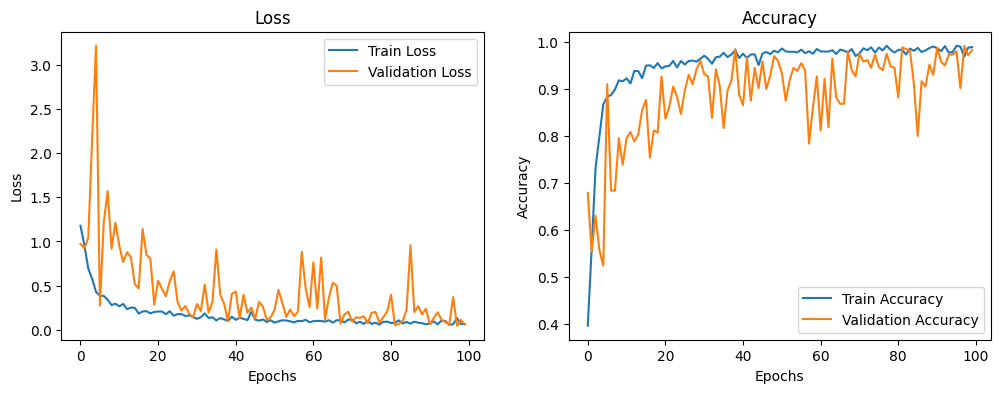

In [9]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Found 600 images belonging to 3 classes.
19/19 [==============================] - 3s 144ms/step


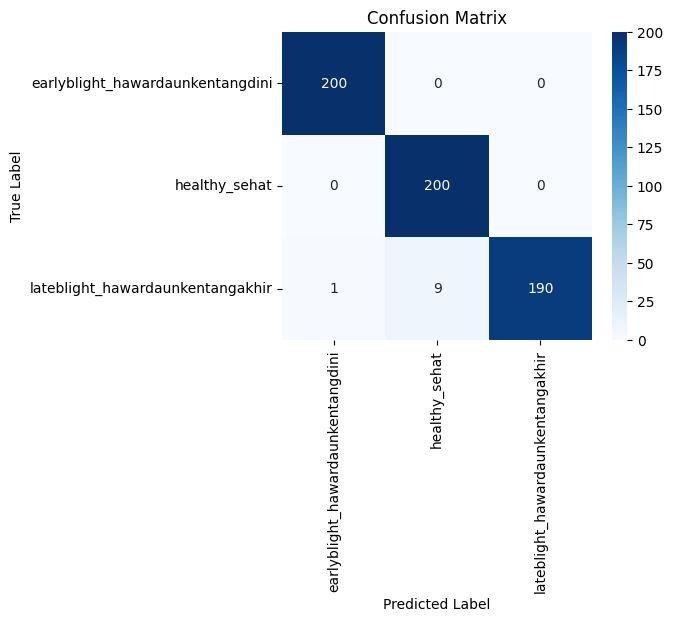

Classification Report:
                                  precision    recall  f1-score   support

earlyblight_hawardaunkentangdini       1.00      1.00      1.00       200
                   healthy_sehat       0.96      1.00      0.98       200
lateblight_hawardaunkentangakhir       1.00      0.95      0.97       200

                        accuracy                           0.98       600
                       macro avg       0.98      0.98      0.98       600
                    weighted avg       0.98      0.98      0.98       600



In [10]:
# Load model yang sudah dilatih
model = tf.keras.models.load_model('kentang_disease_classifier.h5')

# Mendefinisikan ulang generator untuk data validasi tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

# Mendapatkan prediksi dari model
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan label sebenarnya
y_true = validation_generator.classes

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print('Classification Report:')
print(class_report)

In [28]:
img_path = '51bc94fe-ba23-4776-a9ec-727e55015acb___RS_Early.B 8267_180deg.JPG'  # Ganti dengan path gambar yang ingin diuji

# Memuat gambar dan menyesuaikan ukurannya
img = image.load_img(img_path, target_size=(150, 150))

# Mengubah gambar menjadi larik numpy
img_array = image.img_to_array(img)

# Menambahkan dimensi batch (karena model memerlukan input batch)
img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model.predict(img_array)

# Mendapatkan indeks kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Mengganti indeks kelas dengan label kelas
if predicted_class == 0:
    label = "Penyakit A"
elif predicted_class == 1:
    label = "Penyakit B"
else:
    label = "Penyakit C"

print("Predicted class:", label)
print(img_array)

1/1 [==============================] - 0s 18ms/step
Predicted class: Penyakit B
[[[[209. 206. 217.]
   [156. 153. 164.]
   [179. 176. 187.]
   ...
   [145. 140. 147.]
   [158. 153. 160.]
   [136. 131. 138.]]

  [[181. 178. 189.]
   [180. 177. 188.]
   [171. 168. 179.]
   ...
   [141. 136. 143.]
   [163. 158. 165.]
   [152. 147. 154.]]

  [[170. 167. 178.]
   [173. 170. 181.]
   [185. 182. 193.]
   ...
   [149. 144. 151.]
   [168. 163. 170.]
   [160. 155. 162.]]

  ...

  [[167. 162. 168.]
   [178. 173. 179.]
   [188. 183. 189.]
   ...
   [153. 146. 153.]
   [186. 179. 186.]
   [129. 122. 129.]]

  [[170. 165. 171.]
   [208. 203. 209.]
   [160. 155. 161.]
   ...
   [153. 146. 153.]
   [173. 166. 173.]
   [177. 170. 177.]]

  [[185. 180. 186.]
   [173. 168. 174.]
   [176. 171. 177.]
   ...
   [149. 142. 149.]
   [133. 126. 133.]
   [138. 131. 138.]]]]
